In [1]:
#!/usr/bin/python3.10

Prerequisites: pandas, xlrd, matplotlib, rpy2

# HSMC modelling: switching linear mixed models

## Configuration
### It is assumed that this notebook is run from StructureAnalysis/sequence_analysis/tutorials

**Import OpenAlea packages**

In [2]:
from openalea.stat_tool import _stat_tool
from openalea.sequence_analysis import _sequence_analysis
from openalea.sequence_analysis.hidden_semi_markov import HiddenSemiMarkov
from openalea.sequence_analysis.simulate import Simulate
from openalea.sequence_analysis.data_transform import Thresholding

from openalea.stat_tool.data_transform import *
from openalea.stat_tool.cluster import Cluster
from openalea.stat_tool.cluster import Transcode, Cluster

import openalea.stat_tool.plot #import DISABLE_PLOT
# openalea.stat_tool.plot.DISABLE_PLOT = True
from openalea.stat_tool.plot import DISABLE_PLOT
DISABLE_PLOT = False

import os

from openalea.stat_tool.output import plot, Plot

plot.DISABLE_PLOT = DISABLE_PLOT

from openalea.stat_tool.plot import get_plotter, mplotlib 

##### Check pandas version

In [3]:
# print pd.__version__

In [4]:
import xlrd
xlrd.__version__

'2.0.1'

##### Enabling R extensions

In [5]:
%load_ext rpy2.ipython

#####  Place variables in markdown outputs

In [6]:
from IPython.display import Markdown
from IPython.core.magic import register_cell_magic


@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

## Determining if images have to be saved (not used for the moment)

## Loading and preparing data

In [7]:
import sys, os

In [8]:
sys.path

['/home/jdurand/devlp/Git/openalea/StructureAnalysis',
 '/home/jdurand/miniforge3/envs/openalea/lib/python310.zip',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/lib-dynload',
 '',
 '/home/jdurand/.local/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.SConsX-2.4.0-py3.9.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/sequence_analysis/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/OpenAlea.StatTool-2.0.0-py3.10-linux-x86_64.egg',
 '/home/jdurand/devlp/Git/openalea/StructureAnalysis/stat_tool/src',
 '/home/jdurand/miniforge3/envs/openalea/lib/python3.10/site-packages/openalea.deploy-3.1.2-py3.10.egg']

In [9]:
sys.path.append(".." + os.sep + "tutorials")

In [10]:
# TODO: fix this
# get_shared_data("data")

In [11]:
from pathlib import Path
data_path = Path(openalea.sequence_analysis.__path__[0])
data_path = str(Path.joinpath(data_path.parent.parent.parent.absolute(), "share","data"))


**Read an existing HSMC model**

In [12]:
model_file = "switching_lmm_irred.hsc"

hsm = HiddenSemiMarkov(data_path + os.sep + model_file)

In [13]:
print(hsm.display())

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
1    0    0    

TRANSITION_PROBABILITIES
0    0.8  0.2  
0.4  0    0.6  
0.8  0.2  0    

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 0   median: 0   mode: 0
variance: 0   standard deviation: 0

time up to the first occurrence of state 1 distribution
mean: 6.25102   median: 4   mode: 3
variance: 48.8701   standard deviation: 6.99072   lower quartile: 2   upper quartile: 6

time up to the first occurrence of state 2 distribution
mean: 12.1464   median: 10   mode: 8
variance: 82.5395   standard deviation: 9.08513   lower quartile: 6   upper quartile: 16

state 0 recurrence time distribution
mean: 4.62258   median: 1   mode: 1
variance: 59.1125   standard deviation: 7.68847   lower quartile: 1   upper quartile: 5

state 1 recurrence time distribution
mean: 2.82455   median: 1   mode: 1
variance: 31.2908   standard deviation: 5.59382   lower quartile: 1   upper quartile: 1

state 2 r

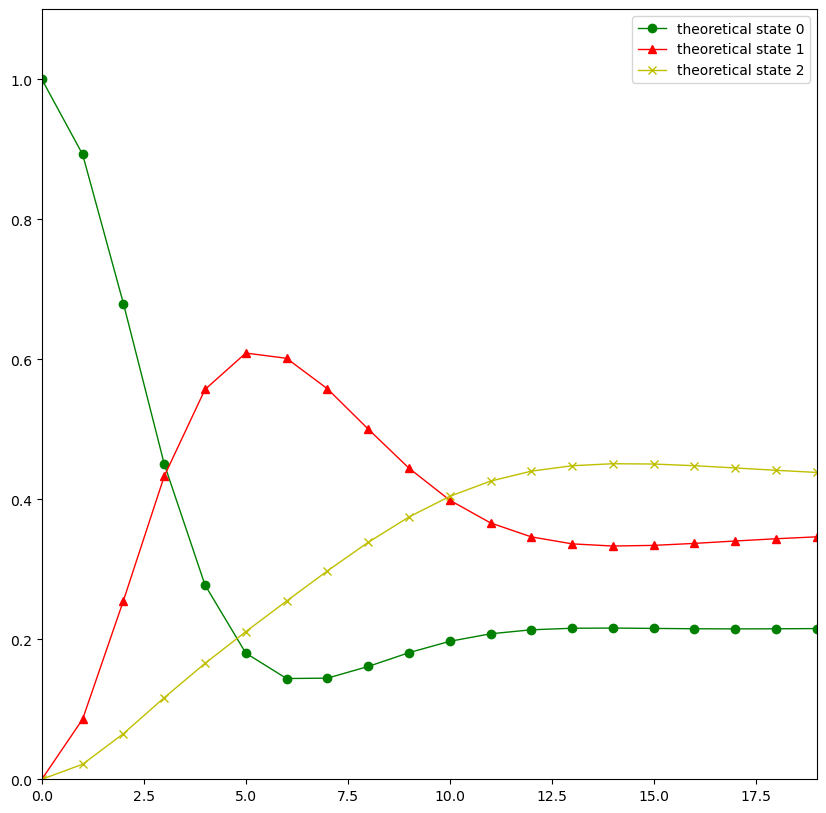

In [14]:
hsm.plot("Intensity", 0) 

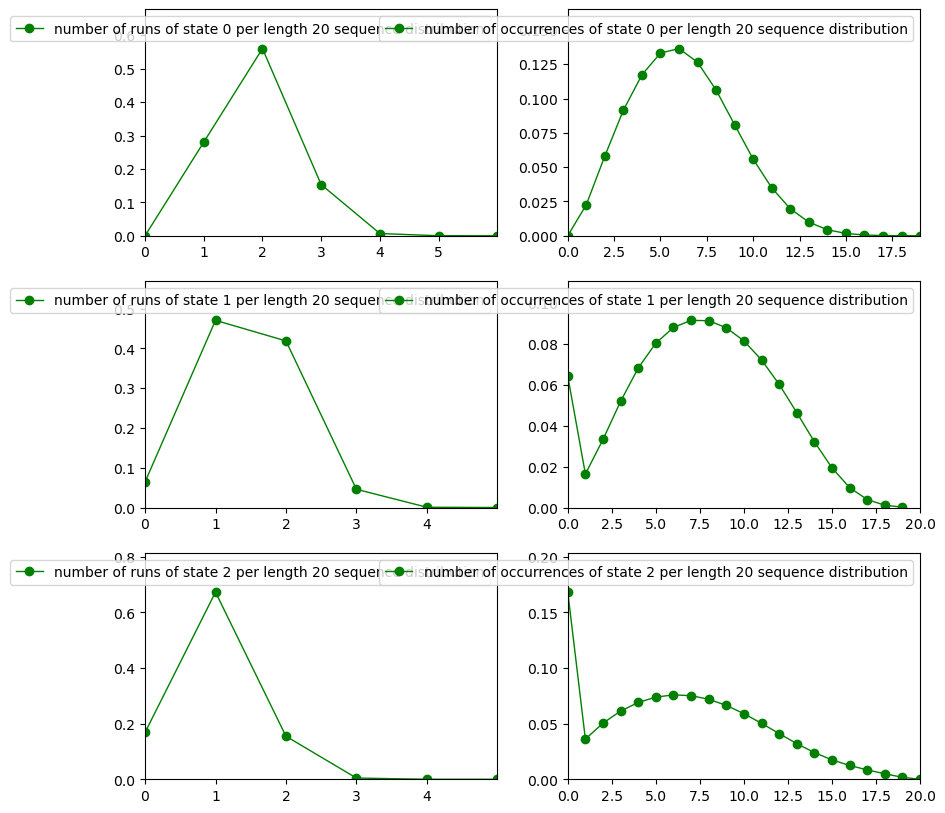

In [15]:
hsm.plot("Counting", 0)

Warning. Empty data.
Warning. Empty data.
Warning. Empty data.
Warning. Empty data.


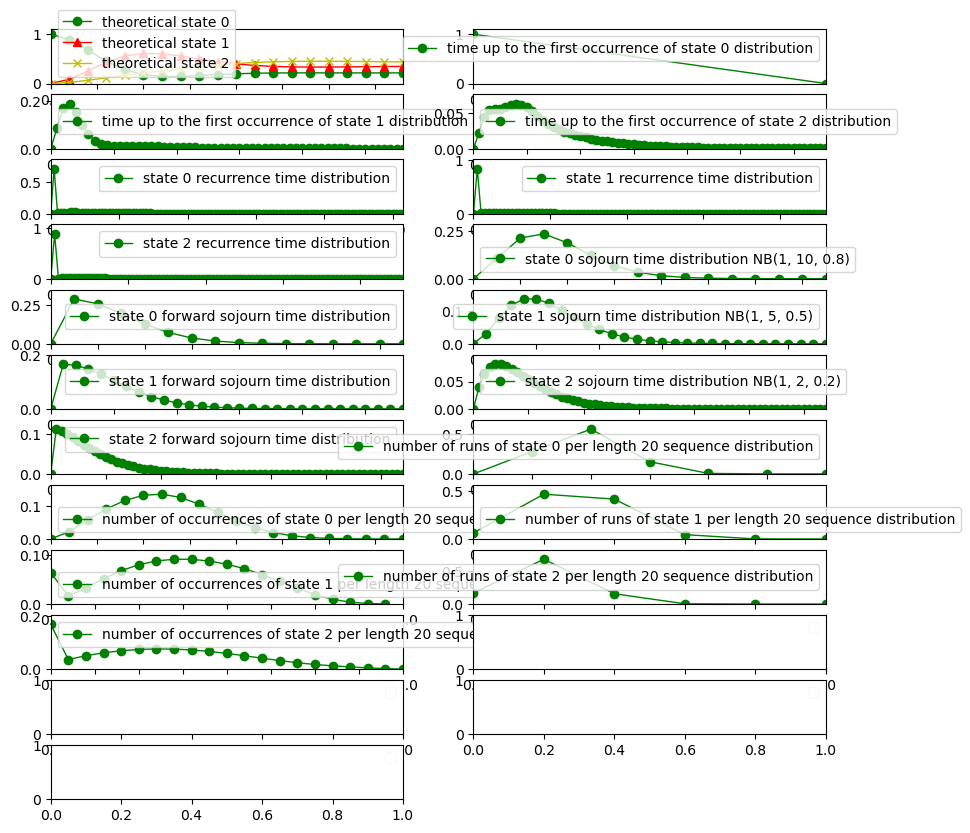

In [16]:
hsm.plot()

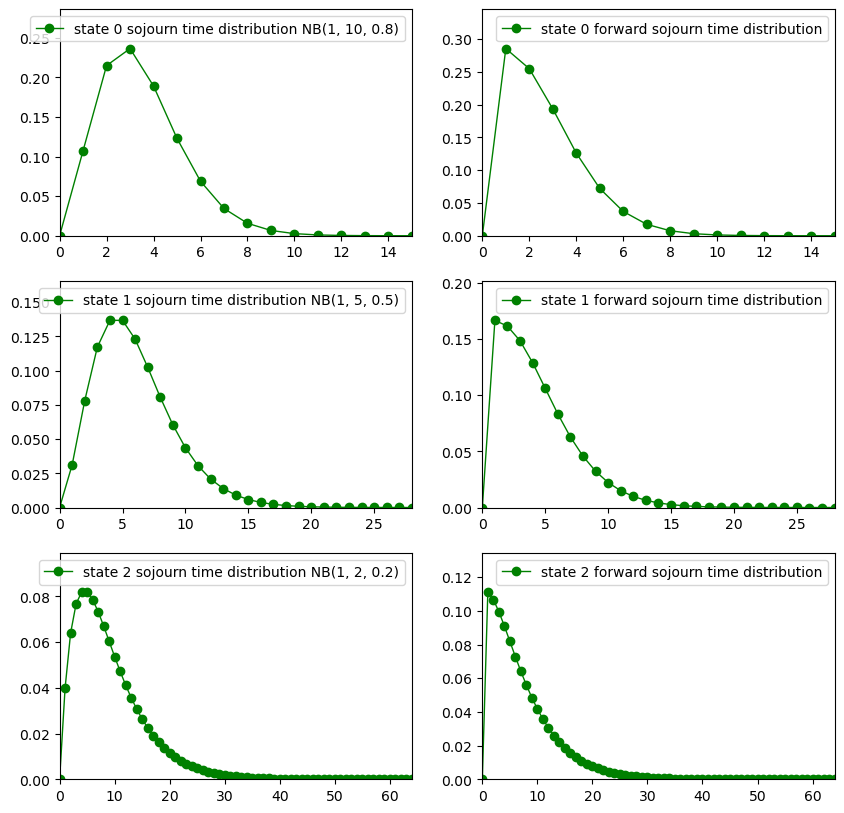

In [17]:
hsm.plot("Sojourn", 0)

**Simulate sequences**

In [18]:
from openalea.sequence_analysis import Simulate

In [19]:
from openalea.stat_tool.distribution import set_seed
set_seed(0)

Simulate *nb_seq* sequences with length *seq_length*

In [20]:
nb_seq = 30
seq_length = 100
seq = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


variable 2 - bin width: 9

N.o. initial states in parallel: 0

ERROR: 0 3.80307 inf

ERROR: 1 6.7303 inf

ERROR: 2 2.48656 inf

ERROR: 3 3.75808 inf

ERROR: 4 4.25691 inf

ERROR: 6 4.28781 inf

ERROR: 7 5.85445 inf

ERROR: 8 4.62564 inf

ERROR: 9 4.56262 inf

ERROR: 10 5.48662 inf

ERROR: 11 4.08792 inf

ERROR: 12 4.15641 inf

ERROR: 13 4.4601 inf

ERROR: 14 3.23092 inf

ERROR: 15 3.25497 inf

ERROR: 16 5.41913 inf

ERROR: 17 3.98085 inf

ERROR: 18 2.96856 inf

ERROR: 19 4.88714 inf

ERROR: 20 5.09121 inf

ERROR: 21 2.99786 inf

ERROR: 22 3.92551 inf

ERROR: 23 3.86456 inf

ERROR: 24 2.87996 inf

ERROR: 25 4.35696 inf

ERROR: 26 6.02623 inf

ERROR: 27 3.0787 inf

ERROR: 28 2.86343 inf

ERROR: 29 5.66375 inf


In [21]:
from openalea.sequence_analysis import Sequences, _MarkovianSequences

In [22]:
seqm = _MarkovianSequences(seq)

In [23]:
print(seqm.display())

2 VARIABLES

VARIABLE 1 : STATE   (3 states)

state frequency distribution - sample size: 3000
mean: 1.168   median: 1   mode: 2
variance: 0.595975   standard deviation: 0.771994   lower quartile: 1   upper quartile: 2

   | frequency
0   684
1  1128
2  1188

time up to the first occurrence of state 0 frequency distribution - sample size: 0

time up to the first occurrence of state 1 frequency distribution - sample size: 30
mean: 5.8   median: 4   mode: 2.5
variance: 30.9931   standard deviation: 5.56714   lower quartile: 2   upper quartile: 6

time up to the first occurrence of state 2 frequency distribution - sample size: 30
mean: 11.8   median: 10.5   mode: 9
variance: 48.9931   standard deviation: 6.99951   lower quartile: 7   upper quartile: 16

state 0 recurrence time frequency distribution - sample size: 654
mean: 4.19572   median: 1   mode: 1
variance: 50.3322   standard deviation: 7.09452   lower quartile: 1   upper quartile: 3

state 1 recurrence time frequency distribution -

In [24]:
# Print first simulated sequence.
# First variable is the simulated state
print(seq[0][0:10])

[[0, 1.0711349395988758], [0, 1.024717453524048], [0, 0.3148538711429429], [0, -0.29399278483251934], [0, -0.5315045188658751], [1, 15.75941836921026], [1, 56.43665832499077], [1, 21.99156487759762], [1, 16.117272328555092], [2, 212.15583278791865]]


Discard variable 1 (state)

## Simulation

In [25]:
set_seed(0)
nb_seq = 30
seq_length = 100
from openalea.stat_tool import NegativeBinomial
d = NegativeBinomial(1, 10., 0.5)

In [26]:
hsmd = hsm.simulation_nb_sequences(nb_seq, seq_length, True)
assert(len(seq) == nb_seq)
assert(len(seq[0]) == seq_length)
# NB: hsm has 1 output process but simulation includes the hidden state
assert(len(seq[0][1]) == 2)


variable 2 - bin width: 9

N.o. initial states in parallel: 0

ERROR: 0 3.80307 inf

ERROR: 1 6.7303 inf

ERROR: 2 2.48656 inf

ERROR: 3 3.75808 inf

ERROR: 4 4.25691 inf

ERROR: 6 4.28781 inf

ERROR: 7 5.85445 inf

ERROR: 8 4.62564 inf

ERROR: 9 4.56262 inf

ERROR: 10 5.48662 inf

ERROR: 11 4.08792 inf

ERROR: 12 4.15641 inf

ERROR: 13 4.4601 inf

ERROR: 14 3.23092 inf

ERROR: 15 3.25497 inf

ERROR: 16 5.41913 inf

ERROR: 17 3.98085 inf

ERROR: 18 2.96856 inf

ERROR: 19 4.88714 inf

ERROR: 20 5.09121 inf

ERROR: 21 2.99786 inf

ERROR: 22 3.92551 inf

ERROR: 23 3.86456 inf

ERROR: 24 2.87996 inf

ERROR: 25 4.35696 inf

ERROR: 26 6.02623 inf

ERROR: 27 3.0787 inf

ERROR: 28 2.86343 inf

ERROR: 29 5.66375 inf


In [27]:
obs = hsmd.select_variable([2], True)

In [28]:
seqm = _MarkovianSequences(obs)

### Add index to seqm, index is used as covariate for simulation / estimation

In [29]:
from openalea.sequence_analysis.sequences import IndexParameterType

index = []
for u in range(nb_seq):
    indexut = []
    indexut.append([d.simulation()])
    for t  in range(1, seq_length):
        indexut.append([indexut[-1][-1]+d.simulation()])
    index.append(indexut)
seq_index = Sequences(index)    
seq_index_markov = _MarkovianSequences(seq_index)
seq_merge = seqm.merge_variable([seq_index_markov], 1)
seq_index = seq_merge.set_variable_as_index_parameter(2, "TIME")
seq_index_markov2 = _MarkovianSequences(seq_index)
assert IndexParameterType(seq_index_markov2)=='TIME'
for u in range(nb_seq):
    for t  in range(0, seq_length):
        assert(int(seq_index_markov2.get_index_parameter(u,t)) == index[u][t][0])



variable 1 - bin width: 9


In [30]:
# Resimulate with new index
hsmd = hsm.semi_markov_switching_lm_simulation(1, seq_index_markov2, openalea.stat_tool.I_DEFAULT, True);


variable 2 - bin width: 9

variable 2 - bin width: 28

N.o. initial states in parallel: 0

ERROR: 0 1.19432 inf

ERROR: 1 0.967168 inf

ERROR: 2 1.60962 inf

ERROR: 4 0.595698 inf

ERROR: 5 0.861735 inf

ERROR: 6 0.613445 inf

ERROR: 7 0.958922 inf

ERROR: 8 0.122778 inf

ERROR: 9 0.830657 inf

ERROR: 10 0.372132 inf

ERROR: 11 1.41769 inf

ERROR: 12 1.68658 inf

ERROR: 13 1.12366 inf

ERROR: 14 0.419199 inf

ERROR: 15 0.737413 inf

ERROR: 16 1.02234 inf

ERROR: 17 0.0700168 inf

ERROR: 18 0.750965 inf

ERROR: 19 0.213705 inf

ERROR: 20 1.21809 inf

ERROR: 21 0.925011 inf

ERROR: 22 1.39889 inf

ERROR: 23 0.754654 inf

ERROR: 24 0.483673 inf

ERROR: 25 0.0940551 inf

ERROR: 26 0.519552 inf

ERROR: 27 0.440012 inf

ERROR: 28 0.33315 inf

ERROR: 29 0.434346 inf


### Plot index and simulated values per state

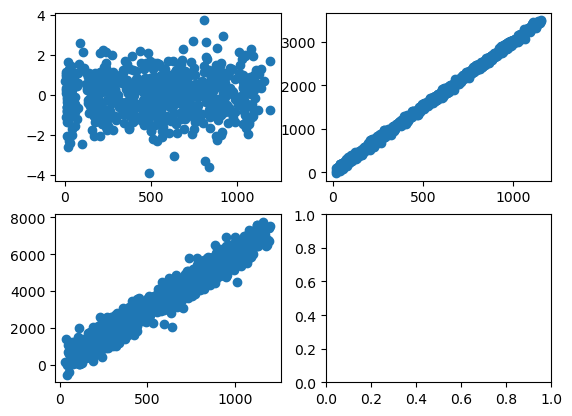

In [31]:
values = {}
for u in range(hsmd.nb_sequence):
    for t in range(len(hsmd[u])):
        state = hsmd[u][t][0]
        if state in values.keys():
            values[state][0] += [hsmd.get_index_parameter(u,t)] # predictor
            # values[state][0] += [index[u][t][0]] # predictor
            values[state][1] += [hsmd[u][t][1]] # simulated value
        else:
            values[state] = [[],[]]
nb_states = len(values.keys())
import matplotlib.pyplot as plt       
import numpy as np
fig, subfigs = plt.subplots(int(np.ceil(nb_states / 2)), 2) 
for k in values.keys():    
    subfigs[int(k/2)][k%2].plot(values[k][0],values[k][1],'o')
plt.show()

### Plot one sequence with state

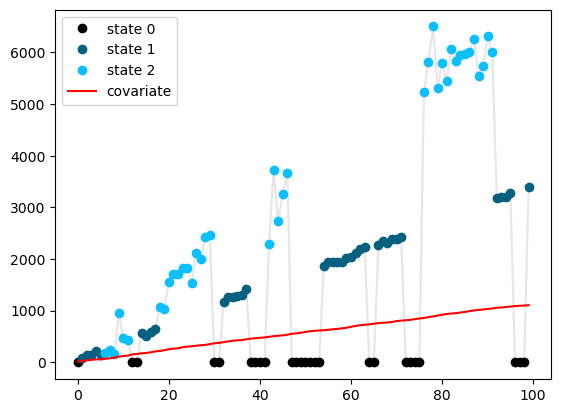

In [32]:
s = 0
state_s = []
obs_s = []
cov_s = []
for t in range(len(hsmd[s])):
    state_s += [hsmd[s][t][0]]
    obs_s += [hsmd[s][t][1]]
    cov_s += [hsmd.get_index_parameter(s,t)]

state_s = np.array(state_s)
obs_s = np.array(obs_s)
cov_s = np.array(cov_s)
plt.plot(obs_s, color=(0.9, 0.9, 0.9))
sstate_s = set(state_s)
for k in sstate_s:
    cl = float(k)
    cl = np.array([cl, 15*cl, 20*cl]) / (20*(nb_states-1))
    plt.plot(np.arange(0, len(hsmd[s]))[state_s==k], obs_s[state_s==k],  'o', 
             color=cl, label="state " + str(k))
plt.plot(cov_s, color="red", label="covariate")
plt.legend()
plt.show()

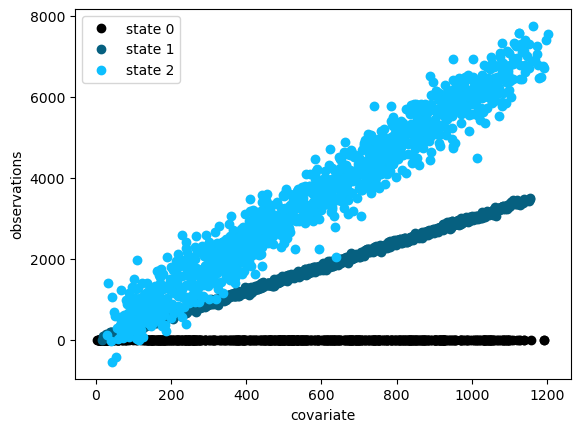

In [33]:
all_state_s = []
all_obs_s = []
all_cov_s = []
for s in range(len(hsmd)):
    for t in range(len(hsmd[s])):
        all_state_s += [hsmd[s][t][0]]
        all_obs_s += [hsmd[s][t][1]]
        all_cov_s += [hsmd.get_index_parameter(s,t)]

all_state_s = np.array(all_state_s)
all_obs_s = np.array(all_obs_s)
all_cov_s = np.array(all_cov_s)
plt.plot(all_cov_s, all_obs_s, 'o', color=(0.9, 0.9, 0.9))
for k in sstate_s:
    cl = float(k)
    cl = np.array([cl, 15*cl, 20*cl]) / (20*(nb_states-1))
    plt.plot(all_cov_s[all_state_s==k], all_obs_s[all_state_s==k],  'o', 
             color=cl, label="state " + str(k))

plt.xlabel("covariate")
plt.ylabel("observations")
plt.legend()
plt.show()

In [35]:
cl

array([0.05, 0.75, 1.  ])

In [36]:
np.arange(0, len(hsmd[s]))[state_s==0]

array([ 0, 12, 13, 30, 31, 38, 39, 40, 41, 47, 48, 49, 50, 51, 52, 53, 64,
       65, 72, 73, 74, 75, 96, 97, 98])

### Reestimate model

In [37]:
from openalea.sequence_analysis import Estimate
seq_estim = hsmd.select_variable([2], True);
hsmc_est_file = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", hsm, Nbiteration=300)   

0
iteration 1   log-likelihood for the observed sequences: -16898.3
iteration 2   log-likelihood for the observed sequences: -16891
iteration 3   log-likelihood for the observed sequences: -16891
iteration 4   log-likelihood for the observed sequences: -16891

4 iterations

complete/censored state occupancy weights
state 0: 199.924, 9  (0.956922, 0.0430779)
state 1: 187.39, 10  (0.949339, 0.050661)
state 2: 128.614, 11  (0.921211, 0.0787885)

N.o. initial states in parallel: 0

ERROR: 0 1.15047 inf

ERROR: 1 0.991238 inf

ERROR: 2 1.54302 inf

ERROR: 3 0.382284 inf

ERROR: 4 0.569538 inf

ERROR: 5 0.762657 inf

ERROR: 6 0.635904 inf

ERROR: 7 0.837652 inf

ERROR: 8 0.126471 inf

ERROR: 9 0.802854 inf

ERROR: 10 0.30887 inf

ERROR: 11 1.32172 inf

ERROR: 12 1.69704 inf

ERROR: 13 1.14722 inf

ERROR: 14 0.373237 inf

ERROR: 15 0.701812 inf

ERROR: 16 0.975776 inf

ERROR: 17 0.0689797 inf

ERROR: 18 0.774401 inf

ERROR: 19 0.206215 inf

ERROR: 20 1.21528 inf

ERROR: 21 0.88962 inf

ERROR:

In [38]:
print(hsmc_est_file.display())

HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
1         0         0         

TRANSITION_PROBABILITIES
0         0.857645  0.142355  
0.406832  0         0.593168  
0.798414  0.201586  0         

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 0   median: 0   mode: 0
variance: 0   standard deviation: 0

time up to the first occurrence of state 0 frequency distribution - sample size: 0

time up to the first occurrence of state 1 distribution
mean: 5.30301   median: 4   mode: 3
variance: 32.0205   standard deviation: 5.65867   lower quartile: 2   upper quartile: 6

time up to the first occurrence of state 1 frequency distribution - sample size: 30
mean: 3.8   median: 3   mode: 1
variance: 12.3724   standard deviation: 3.51744   lower quartile: 1   upper quartile: 5

time up to the first occurrence of state 2 distribution
mean: 12.989   median: 10   mode: 8
variance: 88.8572   standard deviation: 9.42641   lower quartile: 7   upper

### Restore states

In [41]:
restored = hsmc_est_file.state_sequence_computation(seq_estim, True)


N.o. initial states in parallel: 0

ERROR: 0 1.15047 inf

ERROR: 1 0.991238 inf

ERROR: 2 1.54302 inf

ERROR: 3 0.382284 inf

ERROR: 4 0.569538 inf

ERROR: 5 0.762657 inf

ERROR: 6 0.635904 inf

ERROR: 7 0.837652 inf

ERROR: 8 0.126471 inf

ERROR: 9 0.802854 inf

ERROR: 10 0.30887 inf

ERROR: 11 1.32172 inf

ERROR: 12 1.69704 inf

ERROR: 13 1.14722 inf

ERROR: 14 0.373237 inf

ERROR: 15 0.701812 inf

ERROR: 16 0.975776 inf

ERROR: 17 0.0689797 inf

ERROR: 18 0.774401 inf

ERROR: 19 0.206215 inf

ERROR: 20 1.21528 inf

ERROR: 21 0.88962 inf

ERROR: 22 1.40118 inf

ERROR: 23 0.676442 inf

ERROR: 24 0.471246 inf

ERROR: 25 0.0921653 inf

ERROR: 26 0.482937 inf

ERROR: 27 0.433291 inf

ERROR: 28 0.304617 inf

ERROR: 29 0.405809 inf


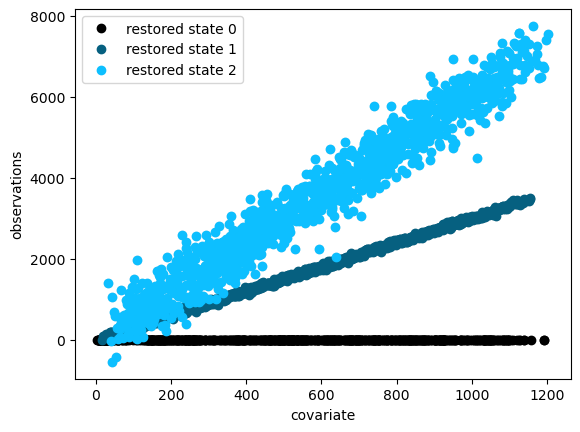

In [44]:
all_rstate_s = []
for s in range(len(hsmd)):
    for t in range(len(hsmd[s])):
        all_rstate_s += [restored[s][t][0]]

all_rstate_s = np.array(all_rstate_s)
plt.plot(all_cov_s, all_obs_s, 'o', color=(0.9, 0.9, 0.9))
for k in sstate_s:
    cl = float(k)
    cl = np.array([cl, 15*cl, 20*cl]) / (20*(nb_states-1))
    plt.plot(all_cov_s[all_rstate_s==k], all_obs_s[all_rstate_s==k],  'o', 
             color=cl, label="restored state " + str(k))

plt.xlabel("covariate")
plt.ylabel("observations")
plt.legend()
plt.show()

**Restored error rate**

In [46]:
float(sum(all_rstate_s != all_state_s) / len(all_rstate_s))

0.0033333333333333335

## Estimate with default parameters

In [47]:
hsmc_est_default = Estimate(seq_estim, "HIDDEN_SEMI-MARKOV", "Ordinary", 3, "Irreducible", Nbiteration=300)
print(hsmc_est_default.display())
       

0
HIDDEN_SEMI-MARKOV_CHAIN

3 STATES

INITIAL_PROBABILITIES
0.99998    1e-05      1e-05      

TRANSITION_PROBABILITIES
0          0.703068   0.296932   
0.668368   0          0.331632   
0.963403   0.0365972  0          

recurrent class: states 0 1 2

time up to the first occurrence of state 0 distribution
mean: 0   median: 0   mode: 0
variance: 0   standard deviation: 0

time up to the first occurrence of state 0 frequency distribution - sample size: 0

time up to the first occurrence of state 1 distribution
mean: 9.49627   median: 4   mode: 3
variance: 141.014   standard deviation: 11.8749   lower quartile: 3   upper quartile: 12

time up to the first occurrence of state 1 frequency distribution - sample size: 30
mean: 2.93333   median: 3   mode: 1
variance: 2.75402   standard deviation: 1.65952   lower quartile: 1   upper quartile: 4

time up to the first occurrence of state 2 distribution
mean: 18.0434   median: 12   mode: 3
variance: 329.5   standard deviation: 18.1521   lower q

Estimate Gaussian distributions instead of linear models